<a href="https://www.kaggle.com/code/taru30/k-means?scriptVersionId=257300340" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/wholesale-customer-retail-uci/__results__.html
/kaggle/input/wholesale-customer-retail-uci/outliers.png
/kaggle/input/wholesale-customer-retail-uci/__notebook__.ipynb
/kaggle/input/wholesale-customer-retail-uci/__output__.json
/kaggle/input/wholesale-customer-retail-uci/custom.css
/kaggle/input/wholesale-customer-retail-uci/__results___files/__results___72_1.png
/kaggle/input/wholesale-customer-retail-uci/__results___files/__results___169_0.png
/kaggle/input/wholesale-customer-retail-uci/__results___files/__results___146_0.png
/kaggle/input/wholesale-customer-retail-uci/__results___files/__results___100_0.png
/kaggle/input/wholesale-customer-retail-uci/__results___files/__results___60_1.png
/kaggle/input/wholesale-customer-retail-uci/__results___files/__results___104_1.png
/kaggle/input/wholesale-customer-retail-uci/__results___files/__results___152_0.png
/kaggle/input/wholesale-customer-retail-uci/__results___files/__results___134_0.png
/kaggle/input/wholesale-customer-r

In [2]:
df = pd.read_csv("/kaggle/input/wholesale-customers-data-set/Wholesale customers data.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [4]:
df['Region'].unique().tolist()

[3, 1, 2]

before moving futher, what is our goal here? to find groups of customers who have similar spending patterns. the goal is not here prediction but segmentation.

this is super valuable in the real world? 
we can target each wholesaler cluster differently. 
we can design schemes depends on the clusters. 

two features, region and channel are just arbitrary, as they are encoded they would be the problem with calculating distance, as it will be computed wrong.

But if i wanna keep them, i can use one hot encoding to make the features binary. 

In [5]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 

In [6]:
# dropping channel and region 
x = df.drop(columns=['Channel', 'Region'], axis=1)

# scaling
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# fit kmeans(k=3)
kMeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kMeans.fit_predict(x_scaled)

# cluster profiles
print(df.groupby("Cluster").mean())

          Channel    Region         Fresh          Milk       Grocery  \
Cluster                                                                 
0        1.249364  2.547074  12062.913486   4115.099237   5534.966921   
1        1.250000  2.750000  52022.000000  31696.000000  18490.750000   
2        2.000000  2.488372   7705.069767  18752.069767  29054.813953   

               Frozen  Detergents_Paper    Delicassen  
Cluster                                                
0         2940.676845       1696.170483   1299.114504  
1        29825.500000       2699.000000  19656.250000  
2         1782.837209      13731.767442   1901.534884  


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


the dataset has many features about 7 features(multi dimensional, hard to plot it on 2d) so we can use PCA here. 

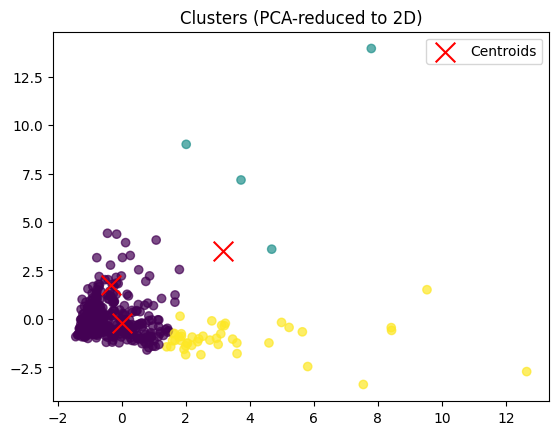

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_scaled)

# getting cluster labels
labels = kMeans.labels_

# plots
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.scatter(kMeans.cluster_centers_[:, 0], kMeans.cluster_centers_[:, 1], c='red', marker='x', s=200, 
            label = 'Centroids')
plt.title("Clusters (PCA-reduced to 2D)")
plt.legend()
plt.show()

before we take the visualization literally, we should keep in mind that we compressed 4 features into 2, they are not falling into the visible clusters blobs anymore. so, we should go for different metrics or higher-dimensional visualisations. 

In [8]:
from sklearn.metrics import silhouette_score
print(silhouette_score(x_scaled, kMeans.labels_))

0.53836620585661


okay the clusters are quite separated. let's visualise it using TSNE(t-distributed Stochastic Neighbor Embedding) 
it will change nothing but it is better than pca as it excels in preserving the local structure

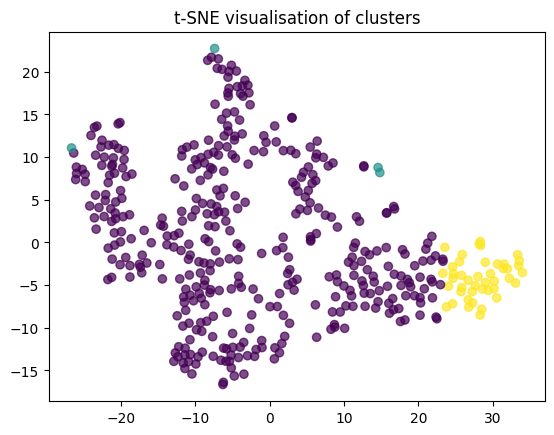

In [9]:
from sklearn.manifold import TSNE
x_tsne = TSNE(n_components=2, random_state=42).fit_transform(x_scaled)

plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=kMeans.labels_, cmap='viridis', alpha=0.7)
plt.title('t-SNE visualisation of clusters')
plt.show()

what's say, should we one hot encoded channel/region? and compare the silhouette scores? and this time using RobustScaler in place of StandardScaler? 

In [10]:
x2 = pd.get_dummies(df, columns=['Channel', 'Region'])

In [11]:
from sklearn.preprocessing import RobustScaler

In [12]:
scaler = RobustScaler()

In [13]:
x2_scaled = scaler.fit_transform(x2)

In [14]:
kMeans = KMeans(n_clusters=3, random_state=42)
df['Clusters_2'] = kMeans.fit_predict(x2_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [15]:
print(silhouette_score(x2_scaled, kMeans.labels_))

0.520124172150477


no change:(

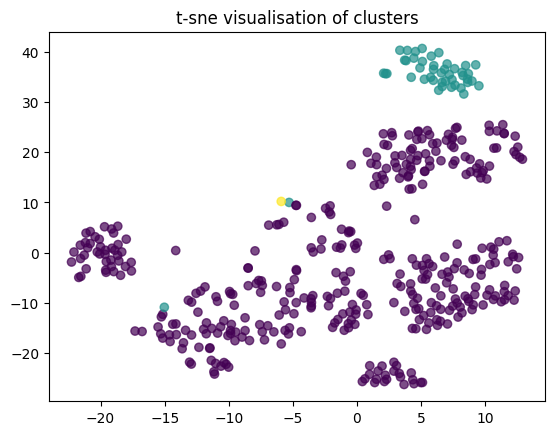

In [16]:
x_tsne = TSNE(n_components=2, random_state=42).fit_transform(x2_scaled)
plt.scatter(x_tsne[:, 0], x_tsne[:, 1], c=kMeans.labels_, cmap='viridis', alpha=0.7)
plt.title('t-sne visualisation of clusters')
plt.show()